In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# ch2_1

## Slide 2

In [2]:
boston = pd.read_csv('../datasets/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
y = boston['MEDV'].values
X = boston.drop('MEDV', axis=1).values

print(type(y))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Slide 3: Building a regression model

In [4]:
X_rooms = X[:,5]

y = y.reshape(-1, 1)

X_rooms = X_rooms.reshape(-1, 1)

print(type(y), y.shape)
print(type(X_rooms), X_rooms.shape)

<class 'numpy.ndarray'> (506, 1)
<class 'numpy.ndarray'> (506, 1)


# Slide 4/5: Plotting house value

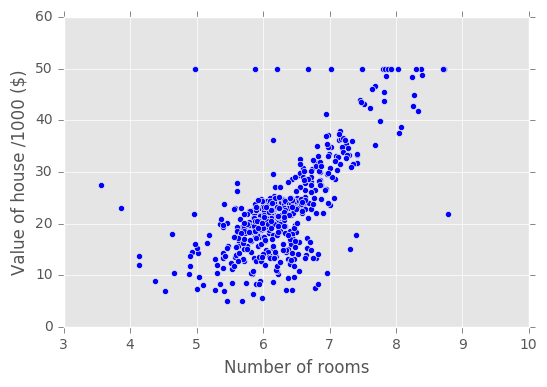

In [5]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

# Slide 6/7: Fitting a linear model

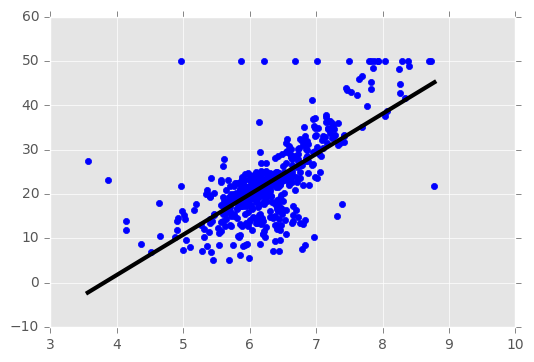

In [6]:
# Linear regression with one predictor variable

from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

# Plot outputs
plt.scatter(X_rooms, y,  color='blue')
plt.plot(prediction_space, regr.predict(prediction_space), color='black',
         linewidth=3)
plt.show()

# ch2_2

## Slide 5

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create linear regression object
regr_all = linear_model.LinearRegression()
# Train the model using the training sets
regr_all.fit(X_train, y_train)
y_pred = regr_all.predict(X_test)

regr_all.score(X_test, y_test)

0.71122600574849626

# ch2_3

## Slide 5

In [8]:
from sklearn.model_selection import cross_val_score

model = linear_model.LinearRegression()

cv_scores = cross_val_score(model, X, y, cv = 5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
print("Standard Deviation of 5-Fold CV Score: {}".format(np.std(cv_scores)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Average 5-Fold CV Score: 0.35327592439586775
Standard Deviation of 5-Fold CV Score: 0.3765678393326386


# ch2_4

## Slide 4 : Ridge regression

In [9]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(X_train, y_train)

ridge.score(X_test, y_test)

0.69969382751273157

## Slide 5: Lasso

In [10]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train, y_train)

lasso.score(X_test, y_test)

0.59502295353285506

## Slide 7/8: Lasso for feature selection

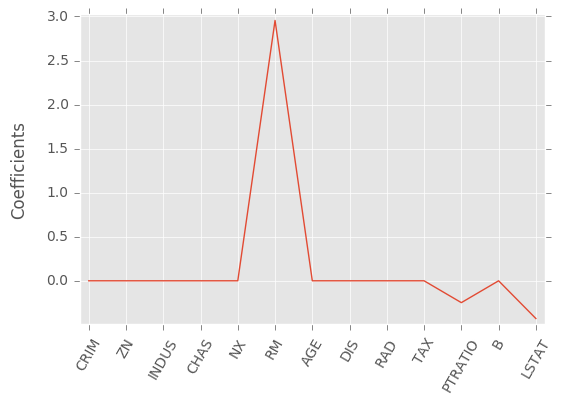

In [11]:
names = boston.drop('MEDV', axis=1).columns

lasso = Lasso(alpha=0.1, normalize=True)

lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.margins(0.02)